# TP 02 : Régression linéaire 


## Régression linéaire à une seule variable 
Dans cette partie, on commence par implémenter la régression linéaire avec une seule variable de prédiction (predictor). Nous allons donc essayer de résoudre le fameux problème de prédiction du prix d'une maison en connaissant sa superficie. 

### 1- Préparation des données : 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import random
%matplotlib inline

In [2]:
header = ["Superficie", "Prix"]
houses = pd.read_csv("datasets/houses.csv", names=header)
houses.head()

,Superficie,Prix
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [3]:
houses.describe()

,Superficie,Prix
count,47.000000,47.000000
mean,2000.680851,340412.659574
std,794.702354,125039.899586
min,852.000000,169900.000000
25%,1432.000000,249900.000000
50%,1888.000000,299900.000000
75%,2269.000000,384450.000000
max,4478.000000,699900.000000


In [4]:
# Extraction des features 
X = houses.iloc[:, :-1].values # Premières colonnes 

Y = houses.iloc[:,-1].values # Dernière colonne 

##### Normalisation 
La normalisation est la mise à echelle des valeurs des caractéristiques. Exemple simple de but : En calculant la distance euclidienne une des caracteristiques va avoir plus d'effet sur le résultat si ses valeurs sont beaucoup plus grandes que celle de l'autre variable. 

In [5]:
# Normalisation 
X = (X-X.mean())/X.std()

## On définit la matrice X comme etant la supérficie concatenée à un vecteur de 1 pour faciliter l'algorithme pour theta0 
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
X[:5, :]

array([[ 1.        ,  0.13141542],
       [ 1.        , -0.5096407 ],
       [ 1.        ,  0.5079087 ],
       [ 1.        , -0.74367706],
       [ 1.        ,  1.27107075]])

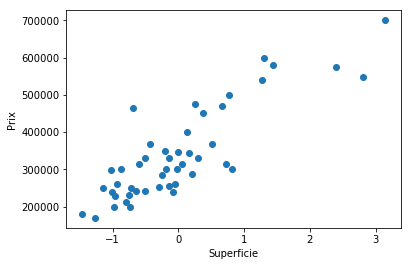

In [6]:
plt.scatter(X[:,1], Y)
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.show()

### 2- Descente du gradient : 

#### 2.1 : Définir les hyperparamétres : 

In [7]:
# Définir les hyperparamétres : 
learning_rate = 0.01 
nb_iter = 250
M = len(X)

In [8]:
# TODO: Définir la fonction de cout : 
def h(x,theta) :
    return np.dot(x,theta)

def J(X,y,theta):
    return (np.power(h(X,theta) - y, 2)).mean()/2

#### 2.2 : Définir l'algorithme de la régression linéaire avec descente du gradient : 

Thetas aléatoires :  [ 0.28908626  0.88981162]


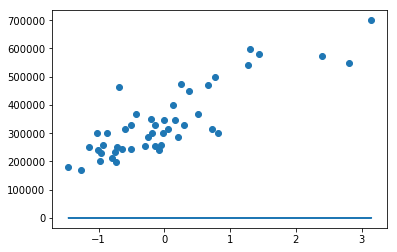

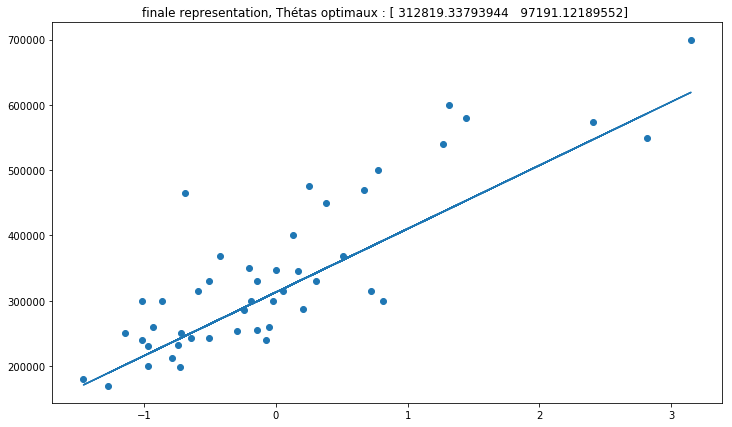

Thétas optimaux :  [ 312819.33793944   97191.12189552]
2475576703.78


In [9]:
# TODO :  Initialiser aléatoirement les paramètres :
## theta est une liste contenant les deux paramètres theta0 et theta1 
theta = np.array([random.uniform(0.1,1) for i in range(X.shape[1])])
print("Thetas aléatoires : ", theta)



# Affichage de la droite aléatoire 
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

# TODO : Définir la déscente du gradient
def gradient_descent(X, Y, theta, nb_iter, learning_rate, affichF = 1,affich = 0):

    evolution = nb_iter // 3 # Afficher les droites à chaque tiers 
    couts_precedents = []
    couts_precedents.append(J(X,Y,theta))
    # Définir l'algorithme de la descente de gradient :
    for i in range(nb_iter) :
        evolution -= 1
        old_theta = theta
        
        derivative = np.dot(X.T, h(X,old_theta) - Y)
        theta = theta - (derivative / M) * learning_rate
        
        couts_precedents.append(J(X,Y,theta))
        if  evolution == 0 :
            if affich != 0 :
                plt.scatter(X[:,1], Y)
                plt.plot(X[:,1], list(map(lambda t : h(t,theta), X)))
                plt.title("fit test {}: theta = {}".format(i, theta))
                plt.show()
                evolution = nb_iter // 3

    if(affichF != 0) :
        # Affichage finale 
        plt.figure(figsize=(12,7))
        plt.scatter(X[:,1], Y)
        plt.title("finale representation, Thétas optimaux : {} ".format(theta))
        plt.plot(X[:,1], list(map(lambda t : h(t,theta), X)))
        plt.show()
    
    return theta, couts_precedents

theta_optimaux, couts_precedents = gradient_descent(X,Y, theta, nb_iter, learning_rate)



print("Thétas optimaux : ", theta_optimaux)
print(couts_precedents[-1])

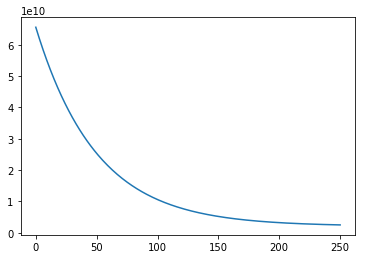

In [10]:
plt.plot(couts_precedents)
plt.show()

**Question 1 ** : 

Pour cette exemple, quel est selon vous le nombre d'itérations nécessaires pour obtenir la convergence dans l'algorithme de la descente du gradient ? 

**Answer 1 : ** 
250

**Question 2 ** : 

Essayer de changer les valeurs du learning_rate, que remarquez-vous ? 
Afficher le graphe des coûts (J) par rapport aux différents learning_rate. 

**Answer 2 : ** 


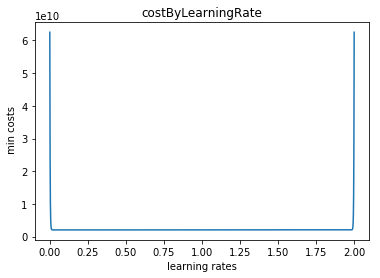

In [11]:
# Affichage du graphe des coûts par rapport aux learning_rate :
thetaInit = np.random.random(size = X.shape[1])
costByLearningRate = []
learning_rates = np.concatenate((np.arange(0.0001,0.3,0.0001),np.arange(1.5,2,0.0001)))
for l in learning_rates :
    couts = []
    theta = thetaInit
    theta_optimaux, couts = gradient_descent(X,Y, theta, nb_iter, l, 0)
    costByLearningRate.append(couts[-1])

plt.plot(learning_rates, costByLearningRate)
plt.ylabel(" min costs")
plt.xlabel("learning rates")
plt.title("costByLearningRate")
plt.show()

### Initialisation des paramétres : 
Initialisation différentes des thetas pour tester l'algorithme : 


In [12]:

thetaInit = []

for r in range(8) :
    thetaInit.append(np.ones([X.shape[1],1]) * ((r-4)/2))
        
costBytheta = []
l = 0.1
for t in thetaInit :
    couts = []
    theta = t
    theta_optimaux, couts = gradient_descent(X,Y, theta, nb_iter, l, 0)
    costBytheta.append(couts[-1])


8.6715116568e-13
8.67150611025e-13
8.67146219627e-13
8.67163531738e-13
8.67177287923e-13
8.6717204733e-13
8.67170200772e-13
8.67177332434e-13


## Skin Cancer Datasets : 
Pour tester des données dans une forme différente et s'assurer que la ligne épouse au mieux les données nous allons exécuter l'algorithme sur les données du fichier skincancer.txt 

In [13]:
header= [ "Latitude", "Mortality", "Ocean", "Long"]
skinCancer = pd.read_csv("datasets/skincancer.txt",  names=header)
skinCancer.head()

,Latitude,Mortality,Ocean,Long
0,33.0,219,1,87.0
1,34.5,160,0,112.0
2,35.0,170,0,92.5
3,37.5,182,1,119.5
4,39.0,149,0,105.5


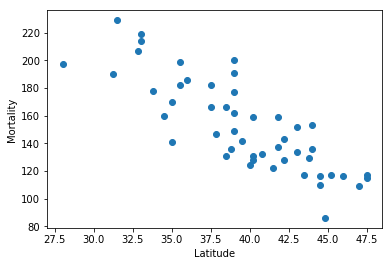

In [14]:
plt.scatter(skinCancer.iloc[:,0], skinCancer.iloc[:,1])
plt.xlabel('Latitude')
plt.ylabel('Mortality')
plt.show()

In [15]:
X = skinCancer.iloc[:,:1].values
Y = skinCancer.iloc[:,1].values


In [16]:
# Normalisation 
X = X = (X - X.mean()) / X.std() 

ones = np.ones([len(X),1])
X = np.concatenate((ones,X),axis=1)
X[:5, :]

array([[ 1.        , -1.43147489],
       [ 1.        , -1.10278572],
       [ 1.        , -0.99322266],
       [ 1.        , -0.44540737],
       [ 1.        , -0.1167182 ]])

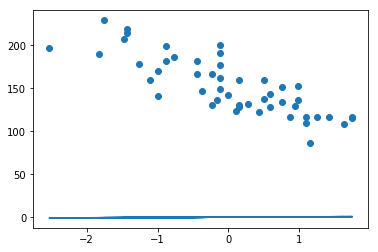

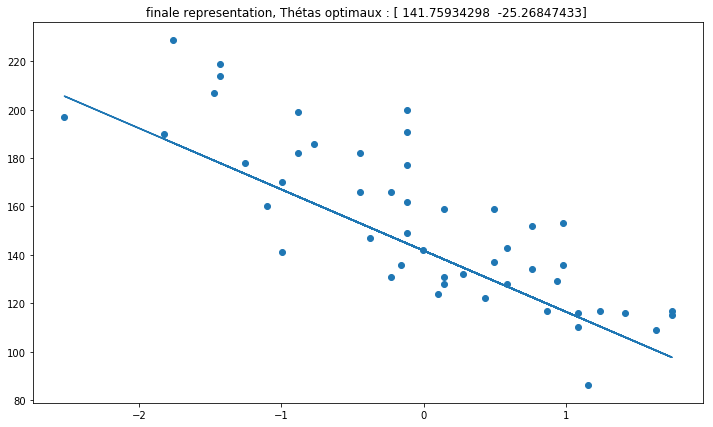

239.064606388
[ 141.75934298  -25.26847433]


In [17]:
theta = np.random.rand(X.shape[1])
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

theta_optimaux, couts_precedents = gradient_descent(X,Y, theta, nb_iter, learning_rate, 1)

print(couts_precedents[-1])
print(theta_optimaux)

# Régression lineaire avec scikit-learn : 


On poursuit avec les données du skin cancer : 
    

In [18]:
# Diviser les données 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  

In [19]:
# Entraîner le modèle 
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print(regressor.intercept_)  

151.644164361


In [21]:
print(regressor.coef_)  

[  0.         -28.33282015]


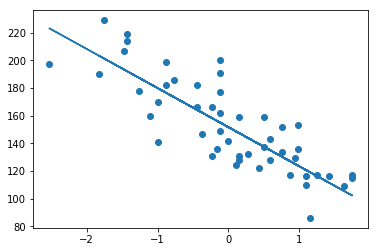

In [22]:
theta = [regressor.intercept_ , regressor.coef_[1]]
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

In [23]:
# Prédire les valeurs du X_test 
y_pred = regressor.predict(X_test)  


In [24]:
# Quelques metrics proposés par sklearn 
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 16.065214336
Mean Squared Error: 417.463439472
Root Mean Squared Error: 20.4319220699
